In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=";")

In [3]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

**Preprocessing the data**

In [7]:
df["job"] = df["job"].astype('category')
df["marital"] = df["marital"].astype('category')
df["education"] = df["education"].astype('category')
df["default"] = df["default"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["contact"] = df["contact"].astype('category')
df["month"] = df["month"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df["poutcome"] = df["poutcome"].astype('category')
df["y"] = df["y"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['y'] = labelencoder.fit_transform(df['y'])

# Upsampling the dependent variable

In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=36548,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.y.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [10]:
df_upsampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36577,33,management,divorced,university.degree,no,yes,no,cellular,jun,wed,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,1
37277,38,admin.,single,high.school,no,yes,yes,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,1
9157,52,self-employed,married,basic.4y,unknown,no,yes,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,1
36369,25,admin.,single,university.degree,no,no,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,1


In [11]:

df1 = df_upsampled.sample(n=2000, random_state=0)

In [12]:
df1 = pd.DataFrame(df1)

In [13]:
X = df1.iloc[:,:-1]
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40210,23,student,single,unknown,no,no,no,cellular,jul,tue,165,2,16,1,success,-1.7,94.215,-40.3,0.876,4991.6
36557,29,services,single,high.school,no,no,no,cellular,jun,wed,725,2,3,1,success,-2.9,92.963,-40.8,1.260,5076.2
13737,32,unknown,single,professional.course,no,no,no,cellular,jul,thu,2029,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
38561,67,admin.,married,basic.4y,unknown,no,no,cellular,oct,thu,299,2,2,2,success,-3.4,92.431,-26.9,0.722,5017.5
24462,53,technician,married,university.degree,no,yes,no,cellular,nov,mon,352,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13337,26,management,single,university.degree,unknown,yes,no,cellular,jul,wed,124,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
39447,20,student,single,basic.4y,no,yes,yes,cellular,apr,tue,278,4,6,1,success,-1.8,93.749,-34.6,0.644,5008.7
1025,44,technician,married,professional.course,unknown,yes,no,telephone,may,wed,481,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
35559,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,2301,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1


In [15]:
y = df1.iloc[:,-1]
y

40210    1
36557    1
13737    1
38561    1
24462    0
        ..
13337    0
39447    1
1025     0
35559    1
30209    1
Name: y, Length: 2000, dtype: int32

In [16]:
features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [17]:
from sklearn.preprocessing import StandardScaler,Normalizer
sc = StandardScaler()
Norm = Normalizer()
X = Norm.fit_transform(X[features])

In [18]:
from sklearn.utils import resample

In [19]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(X).toarray()

In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

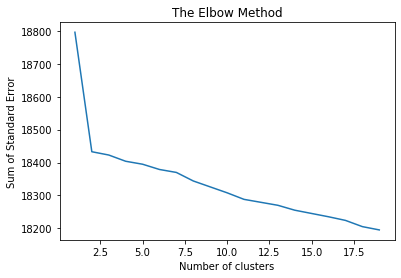

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Standard Error')
plt.show()

In [76]:
kmeans_1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans_1.fit_predict(X)

In [77]:
y_kmeans1

array([0, 0, 1, ..., 1, 1, 1])

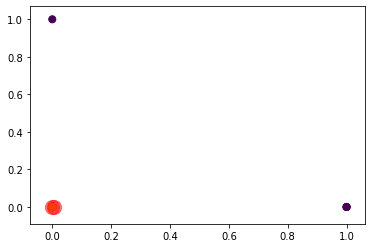

In [78]:
plt.scatter(X[:, 0], X[:, 4], c=y_kmeans1, s=50, cmap='viridis')

centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

# Expectation Maximization

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
pred_gmm = gmm.predict(X)

In [ ]:
pred_gmm

In [ ]:
# Plot the clusters
plt.figure( figsize=(6,6))
plt.scatter(X.iloc[:,0], X.iloc[:,4], c=pred_gmm, edgecolor='black',
            lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()